# PHAS0030 Assignment Week 5 - Safwan Ahmed 22006797 - Approximating the temperature along a bar

We will be investigating the heat equation in two forms: first, a 2D
steady state (equivalent to the Laplace equation); second, a
2D time varying solution (using the forward difference approach).
We will consider a bar of length 21m and width 15m. The end of
the bar at x = 21m will be maintained at 400C, while the other
boundaries will be maintained at 300C.

In [16]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Set up the SOR solver

First, we seek a steady-state solution using an iterative approach
to an elliptic equation. We have:
$$ \frac{\partial^2\theta}{\partial x^2} + \frac{\partial^2\theta}{\partial y^2} = 0 $$

To approximate this, we will be implementing the successive over-relaxation (SOR) update, which is given by:

$$ \phi_{i,j}^{(k+1)} = \frac{\omega}{4}(\phi_{i+1,j}^{(k)}+\phi_{i-1,j}^{(k)}+\phi_{i,j+1}^{(k)}+\phi_{i,j-1}^{(k)}) + (1 - \omega)\,\phi_{i,j}{(k)} $$

Where $\phi$ represents the values across the grid and $\omega$ is a parameter between 0 and 1 that mixes present and updated values of $\phi_{i,j}{(k)}$. In our scenario, we will be using $\theta$ to compute temperature. 

In [17]:
# Define SOR update function
def update_GS_SOR(theta, M, N, omega):
    """Update MxN grid of theta using SOR and Gauss-Seidel
    Input: grid, length of grid, width of grid, omega
    Output: approximation of theta everywhere except the grid edges 
    """
    # We exclude i=0, i=M, j=0 and j=N as they are boundaries
    for i in range(1, N-1):
        for j in range(1, M-1):
            theta[i,j] = omega*0.25*(theta[i-1,j] + theta[i+1,j] + theta[i,j-1] + theta[i,j+1]) + (1 - omega)*theta[i,j]
    return theta

### 2. Set up the array and initial conditions

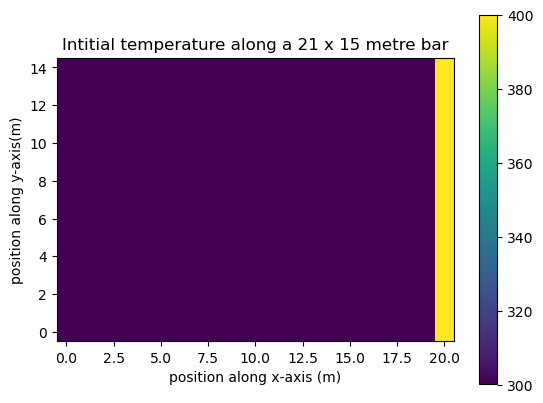

In [18]:
M = 21
N = 15
T1 = 300
T2 = 400
theta = T1 * np.ones((N,M))
theta[:,M-1] = T2
# Plot initial guess
plt.imshow(theta, origin = 'lower'); # remember the bar finishes at 21m so, 20-21 is 400 °C.
plt.xlabel('position along x-axis (m)')
plt.ylabel('position along y-axis(m)')
plt.title('Intitial temperature along a 21 x 15 metre bar')
plt.colorbar();

### 3. Run the solver and plot the result

In [19]:
# Tolerance and maximum number of iterations
omega = 0.5 # stable value of omega
delta = 1.0
tol = 1e-4
# max iterations
iters = 1
max_iter = 1000 # disrupt if iterations exceed 1000
while delta > tol and iters < max_iter:
    thetain = np.copy(theta)
    theta = update_GS_SOR(theta, M, N, omega)
    delta = np.max(np.abs(thetain - theta)) 
    iters += 1
print("Finished after",iters,"iterations")

Finished after 656 iterations


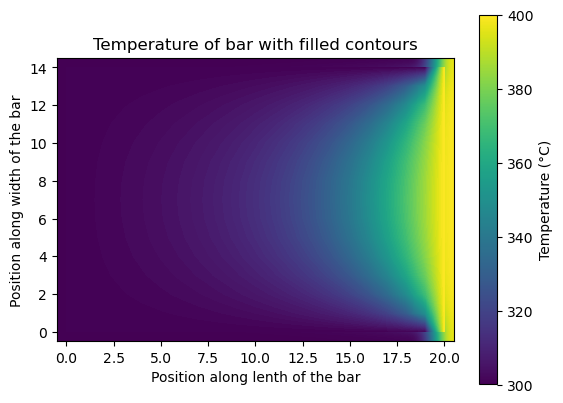

In [20]:
# plot graph
plt.imshow(theta,origin='lower',interpolation='bicubic')
plt.colorbar(label='Temperature (°C)')
plt.contourf(theta,levels=100)
plt.axis('scaled')
plt.title('Temperature of bar with filled contours')
plt.xlabel('Position along lenth of the bar')
plt.ylabel('Position along width of the bar');

### 4. Time evolution function

Here we will solve the parabolic equation for the time-evolution of the bar. To achieve this, will be implementing the step-by-step update in 2 dimensions. This is given by:

$$ \theta_{i,j,n+1} = \theta_{i,j,n} + \zeta (\theta_{i+1,j,n} + \theta_{i-1,j,n} + \theta_{i,j+1,n} + \theta_{i,j-1,n} - 4 \theta_{i,j,n}) $$

Where $\theta$ is the temperature across the bar and $\zeta$ is a constant. 

In [21]:
def update_temperature2D(temper, M, N, zeta):
    """Perform explicit forward FD update for heat equation
    Inputs:
    temper  Array of temperature at present timestep
    M       length of array
    N       width of array
    zeta    Constant of proportionality
    """
    temper_next = np.copy(temper)
    for i in range(1, N-1): 
        for j in range(1, M-1):
            temper_next[i,j] = temper[i,j] + zeta * (temper[i+1][j] + temper[i-1][j] + temper[i][j+1] +
                                                     temper[i][j-1] - 4 * temper[i,j])
    return temper_next

### 5. Set up initial conditions

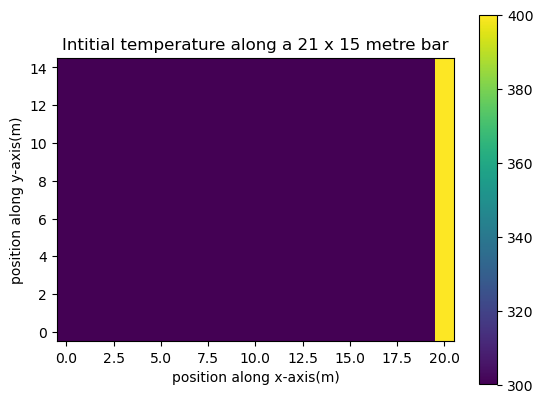

In [22]:
M = 21
N = 15
T1 = 300
T2 = 400
theta0 = T1 * np.ones((N,M))
theta0[:,M-1] = T2
# Plot initial guess
plt.imshow(theta0, origin = 'lower'); # remember the bar finishes at 21m so, 20-21 is 400 °C.
plt.xlabel('position along x-axis(m)')
plt.ylabel('position along y-axis(m)')
plt.title('Intitial temperature along a 21 x 15 metre bar')
plt.colorbar();

### 6. Propagate the solution and store selected points

In [23]:
Nt = 400
zeta = 0.1
for i in range(Nt):
    theta_next = update_temperature2D(theta0, M, N, zeta)
    theta0 = theta_next

### Final and steady-state solutions
Here we will plot the steady-state solution, the final solution and the difference between the 2. 

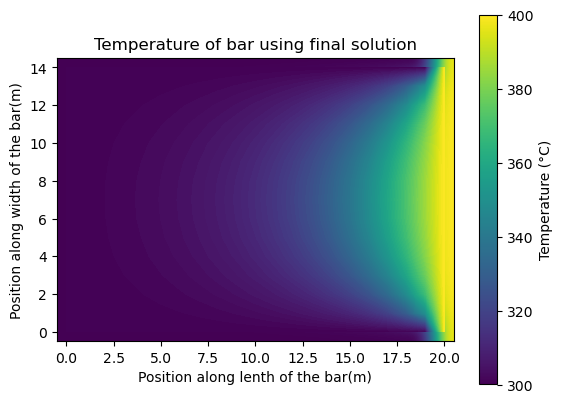

In [24]:
# plot steady state solution
plt.imshow(theta0,origin='lower',interpolation='bicubic')
plt.colorbar(label='Temperature (°C)')
plt.contourf(theta0,levels=100)
plt.axis('scaled')
plt.title('Temperature of bar using final solution')
plt.xlabel('Position along lenth of the bar(m)')
plt.ylabel('Position along width of the bar(m)');

Text(0, 0.5, 'Position along width of the bar(m)')

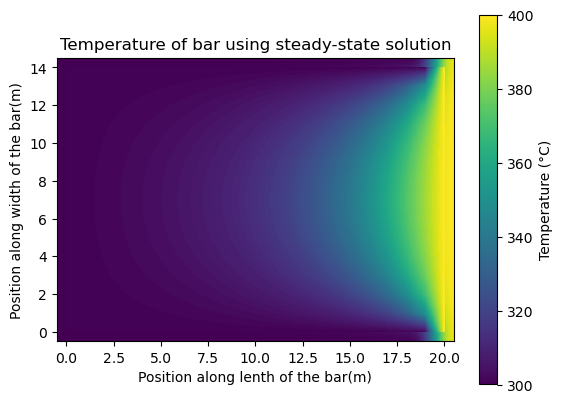

In [25]:
# plot final solution
plt.imshow(theta,origin='lower',interpolation='bicubic')
plt.colorbar(label='Temperature (°C)')
plt.contourf(theta,levels=100)
plt.axis('scaled')
plt.title('Temperature of bar using steady-state solution')
plt.xlabel('Position along lenth of the bar(m)')
plt.ylabel('Position along width of the bar(m)')

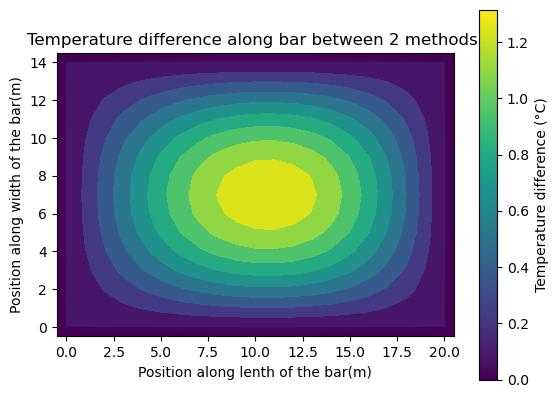

In [27]:
# plot difference between them solution
difference = abs(theta0 - theta)
plt.imshow(difference,origin='lower',interpolation='bicubic')
plt.colorbar(label='Temperature difference (°C)')
plt.contourf(difference,levels=10)
plt.axis('scaled')
plt.title('Temperature difference along bar between 2 methods ')
plt.xlabel('Position along lenth of the bar(m)')
plt.ylabel('Position along width of the bar(m)');

## Conclusion 

The steady-state and final solution both give a reasonable approximation to how we expect temperature to spread along a bar with one end kept at 400°C and another kept at 300°C. When analysing the difference between the solutions, we only see a difference between them in the middle of the bar.